In [1]:
# Name: Lilli Nappi
# CWID: 20006502
# HW10_SOM

In [77]:
pip install MiniSom

In [78]:
from minisom import MiniSom

from sklearn.preprocessing import MinMaxScaler

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:

# Loading dataset
df = pd.read_csv('wisc_bc_ContinuousVar.csv')
# df.head()
# print(df.describe())
# #data preprocessing
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df = df.drop(columns=['id'])
df.head(10)
# print(f'{features[0]} ')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [80]:
df = df.replace([0], None)
missing_values = df.isnull().any()
print(missing_values)

diagnosis                   True
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se                True
concave points_se           True
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_di

In [100]:
df['concavity_mean'] = pd.to_numeric(df['concavity_mean'], errors='coerce')
df['concavity_mean'].fillna(df['concavity_mean'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concavity_mean'] = df['concavity_mean'].astype(int)

df['concave points_mean'] = pd.to_numeric(df['concave points_mean'], errors='coerce')
df['concave points_mean'].fillna(df['concave points_mean'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concave points_mean'] = df['concave points_mean'].astype(int)

df['concavity_se'] = pd.to_numeric(df['concavity_se'], errors='coerce')
df['concavity_se'].fillna(df['concavity_se'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concavity_se'] = df['concavity_se'].astype(int)

df['concave points_se'] = pd.to_numeric(df['concave points_se'], errors='coerce')
df['concave points_se'].fillna(df['concave points_se'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concave points_se'] = df['concave points_se'].astype(int)

df['concave points_se'] = pd.to_numeric(df['concave points_se'], errors='coerce')
df['concave points_se'].fillna(df['concave points_se'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concave points_se'] = df['concave points_se'].astype(int)

df['concavity_worst'] = pd.to_numeric(df['concavity_worst'], errors='coerce')
df['concavity_worst'].fillna(df['concavity_worst'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concavity_worst'] = df['concavity_worst'].astype(int)

df['concave points_worst'] = pd.to_numeric(df['concave points_worst'], errors='coerce')
df['concave points_worst'].fillna(df['concave points_worst'].mean(),inplace=True)
missing_values = df.isnull().any()
df['concave points_worst'] = df['concave points_worst'].astype(int)

print(missing_values)

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

<ipython-input-100-608d4a76fd96>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['concavity_mean'].fillna(df['concavity_mean'].mean(),inplace=True)
<ipython-input-100-608d4a76fd96>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [101]:
df = df.dropna() # drops NaN values
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]


In [102]:
# Splitting the dataset
features = df.drop(columns = ['diagnosis'])  # features
labels = df['diagnosis']  # target variable
features.head()
# target.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0,0,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0,0,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0,0,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0,0,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0,0,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0,0,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0,0,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0,0,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0,0,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0,0,0.2364,0.07678


In [103]:
sc = MinMaxScaler(feature_range = (0,1))
features = sc.fit_transform(features)

In [104]:
sigma = 1.5
lr = 0.5
n_features = features.shape[1]
n_samples = features.shape[0]
print(f"number of samples: {n_samples}")

map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))


print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {n_features}')

number of samples: 569
(map_height, map_width) = (11, 11)
Number of features: 30


In [105]:
som = MiniSom(x=map_height, y=map_width, input_len=n_features, sigma=sigma, learning_rate=lr,
              neighborhood_function='gaussian', random_seed=123)

som.pca_weights_init(features)
som.train(data=features, num_iteration=1000, verbose=True)  # random training

/usr/local/lib/python3.10/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.29018640659483413


In [106]:
# print('-------------\nDistance Map\n------------')
print(f'Shape: {som.distance_map().shape}')
print(f'First Line: {som.distance_map().T}')

Shape: (11, 11)
First Line: [[0.50131093 0.21496131 0.02813298 0.01683905 0.0177153  0.0190223
  0.02325965 0.03922012 0.22032952 0.66462029 0.48851187]
 [0.20637181 0.22278734 0.03902774 0.02529811 0.02623323 0.02665075
  0.03457299 0.04484845 0.24255426 0.86926264 0.70183809]
 [0.02401055 0.03100453 0.02119798 0.0229893  0.02631542 0.02591621
  0.0246237  0.02638086 0.07832828 0.57999364 0.58832757]
 [0.0106629  0.01884098 0.01773385 0.0268257  0.02295861 0.02400751
  0.02367728 0.02781929 0.03964927 0.42415682 0.39599275]
 [0.01049159 0.01506693 0.01588045 0.01719156 0.0221761  0.02415621
  0.02382984 0.02720803 0.04621873 0.433846   0.43233412]
 [0.00928761 0.01668512 0.01372686 0.01591965 0.01942807 0.02395161
  0.02332879 0.02436168 0.04836848 0.50801931 0.56004451]
 [0.01076385 0.01538234 0.01528514 0.01603426 0.02033089 0.02166321
  0.02362475 0.0224219  0.0501241  0.57991139 0.56749447]
 [0.01421436 0.0214701  0.01703337 0.01624906 0.01734539 0.02128439
  0.02454329 0.02726867

In [107]:
frequencies = som.activation_response(features)
print(f'Frequencies:\n {np.array(frequencies, np.uint)}')
print(frequencies)

Frequencies:
 [[ 0  0  8  7 10  9  8  5  0  0  0]
 [ 0  9  7  8  6 12  4  6  5  3  0]
 [ 3 10  7  4  5  8  5 10  4  7  9]
 [ 3  4  6 11  6  6  4  7 10  6  6]
 [ 8  6  8  6 11  9 14  5  8  4  8]
 [10  2  7  3  8  5  9  7  4  3  2]
 [ 7  8 11  9  5  7  5  3  5  4  6]
 [ 5  3  6  5  5 10  3  7  2  3  5]
 [ 0  7  9  3  4  1  6  7  4  2  0]
 [ 0  0  0  5  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0.  0.  8.  7. 10.  9.  8.  5.  0.  0.  0.]
 [ 0.  9.  7.  8.  6. 12.  4.  6.  5.  3.  0.]
 [ 3. 10.  7.  4.  5.  8.  5. 10.  4.  7.  9.]
 [ 3.  4.  6. 11.  6.  6.  4.  7. 10.  6.  6.]
 [ 8.  6.  8.  6. 11.  9. 14.  5.  8.  4.  8.]
 [10.  2.  7.  3.  8.  5.  9.  7.  4.  3.  2.]
 [ 7.  8. 11.  9.  5.  7.  5.  3.  5.  4.  6.]
 [ 5.  3.  6.  5.  5. 10.  3.  7.  2.  3.  5.]
 [ 0.  7.  9.  3.  4.  1.  6.  7.  4.  2.  0.]
 [ 0.  0.  0.  5.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [112]:
print(labels.tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

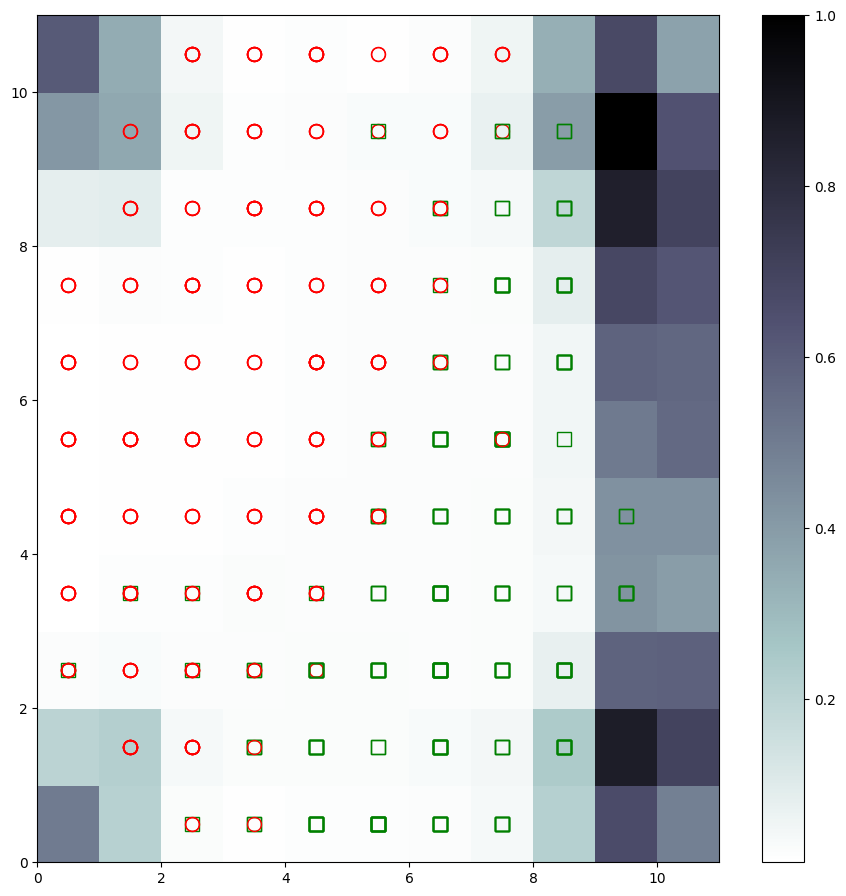

In [120]:
plt.figure(figsize=(map_height, map_width))

# plot U-matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# plot markers
markers = ['o', 's', '^']
colors = ['r', 'g', 'b']
w0=[]
w1=[]
lbl=[]
mkrs=[]

for feature, label in zip(features, labels):
    w = som.winner(feature)
    w0=np.concatenate((w0, w[0]), axis=None)
    w1=np.concatenate((w1, w[1]), axis=None)
    lbl=np.concatenate((lbl, label), axis=None)
    mkrs=np.concatenate((mkrs, labels.tolist()[label]), axis=None)

    plt.plot(w[0] + 0.5, w[1] + 0.5,
        markers[label], markeredgecolor = colors[label],
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)

plt.show()
